In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import sys
sys.path.append("..")
sys.path.append("../src/")

In [61]:
#Getting the model
from src.model.model import get_model
model = get_model()
print(model.fc)

Sequential(
  (output): Linear(in_features=2048, out_features=1, bias=True)
)


In [67]:
# Getting data for training and testing
from src.data.data import train_val_test_split
train_loader, valid_loader, test_loader = train_val_test_split(type="full")
print("Train size", len(train_loader))
print("Validation size", len(valid_loader))
print("Test size", len(test_loader))

Train size 47
Validation size 6
Test size 13


In [71]:
from src.model.train import train_model, test_model, plot_sample
from src.config import cfg

In [63]:
print(f"Randomly training for {cfg.num_of_tries} times!")
test_losses = []
for current_try in range(cfg.num_of_tries):
    print(f"Training {current_try+1}th try...")
    train_model(train_loader=train_loader, valid_loader=valid_loader, model=model)
    test_losses.append(test_model(test_loader=test_loader, model=model))

Randomly training for 1 times!
Training 1th try...
	Training models...
		Epoch: 1/1.. Validation loss decreased (inf --> 20.812074).  Saving model ...
	Testing model...
	Testing loss: 21.493


In [64]:
import pandas as pd
t = list(range(1, num_of_tries+1))
test_df = pd.DataFrame(list(zip(t, test_losses)), columns=['Try-th', 'Test loss'])
test_df['Test loss'].describe()

count     1.000000
mean     21.493333
std            NaN
min      21.493333
25%      21.493333
50%      21.493333
75%      21.493333
max      21.493333
Name: Test loss, dtype: float64

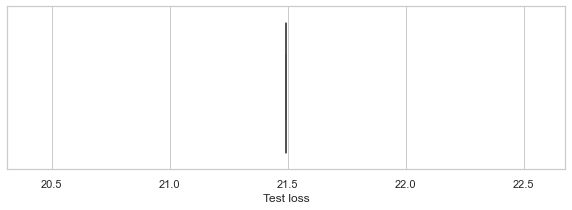

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 3))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.boxplot(x="Test loss", data=test_df);

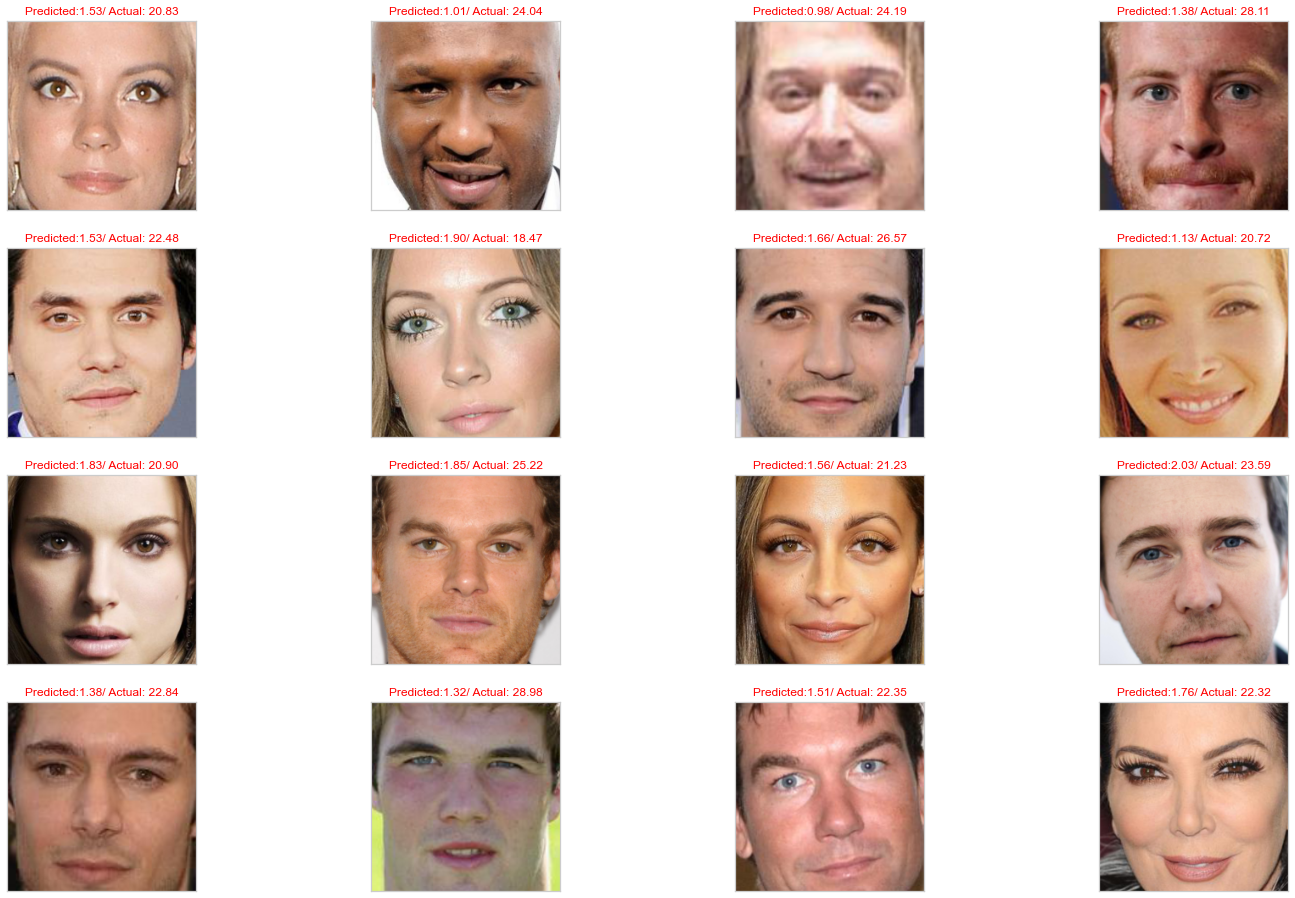

In [66]:
plot_sample(data_loader=test_loader, model=model)